In [42]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [49]:
# read csv
data = pd.read_csv("Iris.csv")
data.dropna(inplace=True)
X = data.drop("Species",axis=1)
y = data["Species"]

In [50]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

# t-SNE
Computes pairwise similarities with normalized Gaussian kernel <br>
Measure normalized Student-t similarities in t-SNE map <br>
Minimize the divergence between both distributions

In [63]:
from sklearn.manifold import TSNE

X_embedded = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=10, n_iter=400).fit_transform(X)

C:\Users\loukr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\loukr\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


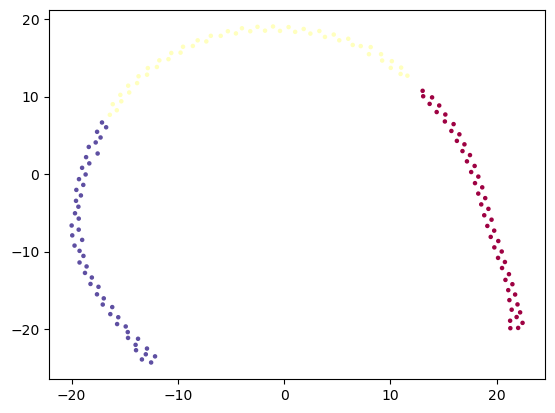

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X_embedded[:,0], X_embedded[:,1], s= 5, c=y, cmap='Spectral')

 # Spectral Clustering

### Pairwise similarities

similarity function s(xi, xj) = RBF


In [90]:
from sklearn.metrics.pairwise import euclidean_distances

#Define the RBF kernel function
def rbf_kernel(gamma, X, X_new=None):
    if X_new is None:
        X_new = X
    distances = euclidean_distances(X, X_new, squared=True)
    
    print("Euclidean distances: ", distances)
    
    rbf_similarities=np.exp(-gamma * distances)
    print("Similarity Matrix: ", rbf_similarities)
    
    return rbf_similarities

# Calculate the similarity matrix

similarity_matrix = rbf_kernel(0.5, X_embedded)

Euclidean distances:  [[0.0000000e+00 5.4082727e-01 1.7928832e+00 ... 1.2178098e+03
  1.1306165e+03 1.1617366e+03]
 [5.4082727e-01 0.0000000e+00 5.9608901e-01 ... 1.2695653e+03
  1.1805277e+03 1.2122463e+03]
 [1.7928832e+00 5.9608901e-01 0.0000000e+00 ... 1.3047891e+03
  1.2142097e+03 1.2472614e+03]
 ...
 [1.2178098e+03 1.2695653e+03 1.3047891e+03 ... 0.0000000e+00
  1.6851417e+00 9.0547079e-01]
 [1.1306165e+03 1.1805277e+03 1.2142097e+03 ... 1.6851417e+00
  0.0000000e+00 7.5779074e-01]
 [1.1617366e+03 1.2122463e+03 1.2472614e+03 ... 9.0547079e-01
  7.5779074e-01 0.0000000e+00]]
Similarity Matrix:  [[1.         0.76306385 0.40801898 ... 0.         0.         0.        ]
 [0.76306385 1.         0.74226826 ... 0.         0.         0.        ]
 [0.40801898 0.74226826 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.4306021  0.6358864 ]
 [0.         0.         0.         ... 0.4306021  1.         0.6846172 ]
 [0.         0.         

In [91]:
adjacency_matrix=similarity_matrix

In [92]:
adjacency_matrix

array([[1.        , 0.76306385, 0.40801898, ..., 0.        , 0.        ,
        0.        ],
       [0.76306385, 1.        , 0.74226826, ..., 0.        , 0.        ,
        0.        ],
       [0.40801898, 0.74226826, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.4306021 ,
        0.6358864 ],
       [0.        , 0.        , 0.        , ..., 0.4306021 , 1.        ,
        0.6846172 ],
       [0.        , 0.        , 0.        , ..., 0.6358864 , 0.6846172 ,
        1.        ]], dtype=float32)

## Similarity Graph

### Eigenspace - unnormalized graph Laplacian

In [93]:
def unnormalized_graph_laplacian(A):
    
    #diag degree matrix of S
    degree = np.sum(A, axis=1) #degree of each element in S
    D=np.diag(degree)
    print("diag degree matrix", D)
    
    #Unnormalized graph Laplacian
    L=D-A 
    print("Laplacian", L)
    
    print("is Laplacian symmetric:", np.array_equal(L,L.T))
    
    return L

In [94]:
L=unnormalized_graph_laplacian(adjacency_matrix)

diag degree matrix [[3.2451925 0.        0.        ... 0.        0.        0.       ]
 [0.        3.5598319 0.        ... 0.        0.        0.       ]
 [0.        0.        3.870349  ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 3.7470438 0.        0.       ]
 [0.        0.        0.        ... 0.        3.4593647 0.       ]
 [0.        0.        0.        ... 0.        0.        3.1437795]]
Laplacian [[ 2.2451925  -0.76306385 -0.40801898 ...  0.          0.
   0.        ]
 [-0.76306385  2.5598319  -0.74226826 ...  0.          0.
   0.        ]
 [-0.40801898 -0.74226826  2.870349   ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.7470438  -0.4306021
  -0.6358864 ]
 [ 0.          0.          0.         ... -0.4306021   2.4593647
  -0.6846172 ]
 [ 0.          0.          0.         ... -0.6358864  -0.6846172
   2.1437795 ]]
is Laplacian symmetric: True


In [95]:
evalues, evectors = np.linalg.eigh(L) #Laplacian is symmetric

### Searching for elbow point

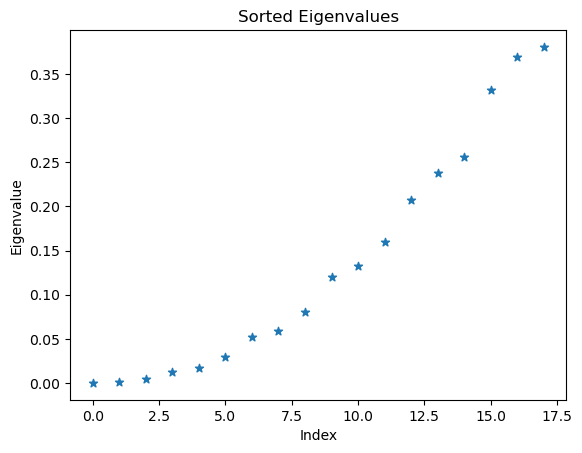

In [96]:
plt.scatter(range(18), evalues[:18], marker='*')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Sorted Eigenvalues')
plt.show()

In [97]:
Vnxk=evectors[0:10,0:5]

In [98]:
Vnxk 

array([[-0.08164751,  0.12098315, -0.06643055,  0.09849278, -0.14368221],
       [-0.08164749,  0.12097711, -0.06641601,  0.09842878, -0.14355724],
       [-0.08164749,  0.12094617, -0.06634141,  0.09810092, -0.1429176 ],
       [-0.08164749,  0.12092593, -0.06629266,  0.09788703, -0.14250071],
       [-0.08164749,  0.12088088, -0.0661841 ,  0.09741084, -0.14157261],
       [-0.08164749,  0.12081256, -0.06601956,  0.09668977, -0.14016789],
       [-0.08164749,  0.12073622, -0.06583585,  0.09588626, -0.13860415],
       [-0.08164747,  0.12059804, -0.06550352,  0.09443482, -0.13578147],
       [-0.08164746,  0.12038804, -0.06499896,  0.09223708, -0.13151337],
       [-0.08164745,  0.12014649, -0.06441944,  0.0897223 , -0.12663896]],
      dtype=float32)

### K means Clustering

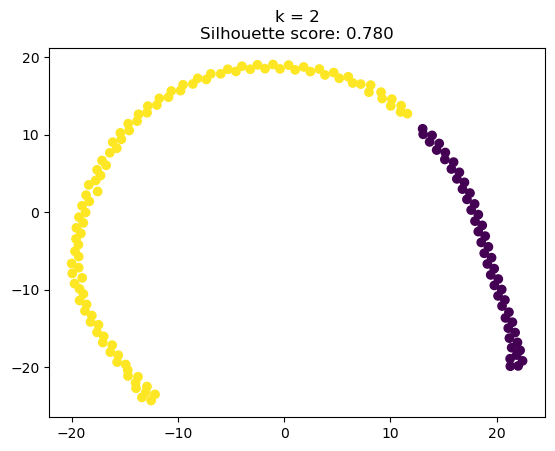

ARI score:  0.5681159420289855


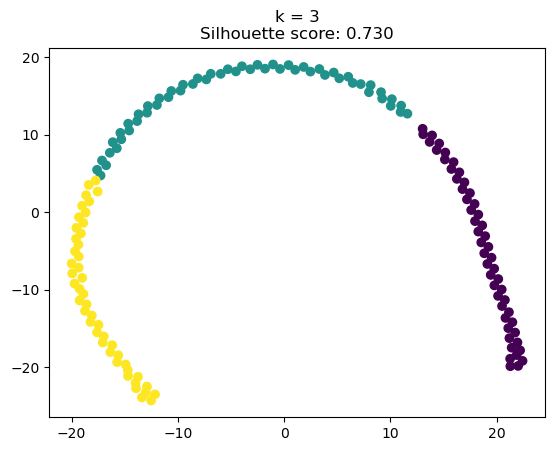

ARI score:  0.9222414299226981


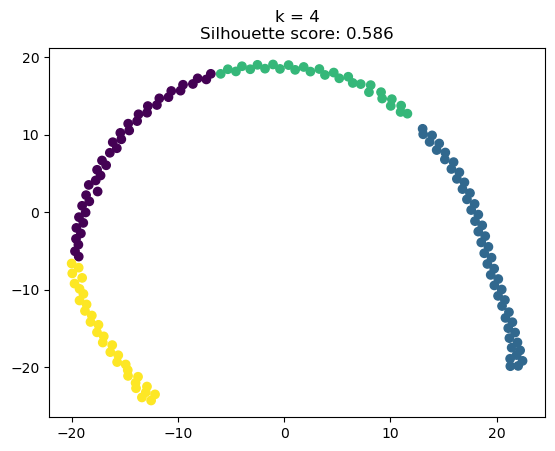

ARI score:  0.6572522041739947


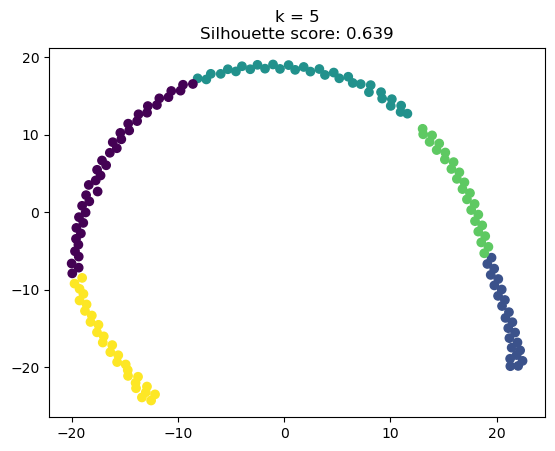

ARI score:  0.5025687464155272


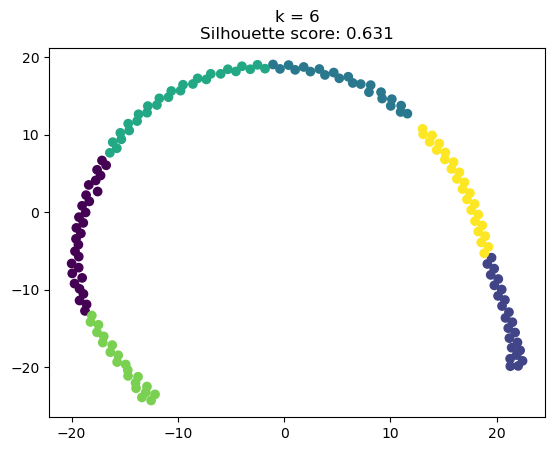

ARI score:  0.5700006711398921


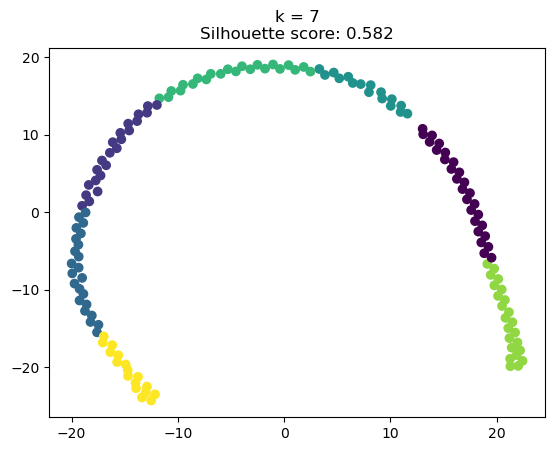

ARI score:  0.44472049689440996


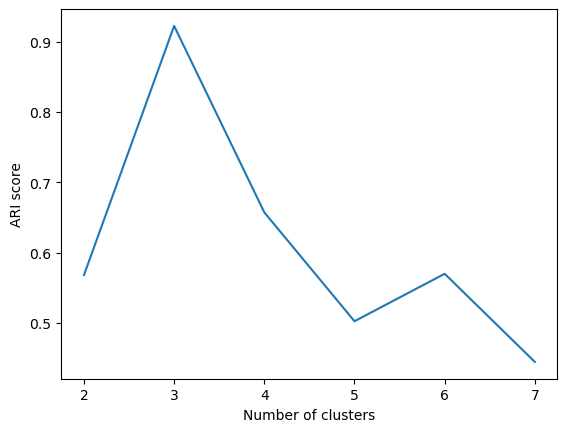

In [100]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List to store the ARI scores
ari_scores = []

# The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the
# same or different clusters in the predicted and true clusterings.

# Loop through different values of k
for k in range(2, 8):
    
    Vnxk=evectors[:,0:k]
    # Fit the KMeans model
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Vnxk)
   

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=kmeans.labels_)
    score = silhouette_score(Vnxk, kmeans.labels_)
    plt.title("k = {}\nSilhouette score: {:.3f}".format(k, score))
    plt.show()
    
   # Compute the ARI score
    ari = adjusted_rand_score(y, kmeans.labels_)
    print("ARI score: ", ari)
    ari_scores.append(ari)


plt.plot(range(2, 8), ari_scores)
plt.xlabel('Number of clusters')
plt.ylabel('ARI score')
plt.show()